In [1]:
# Importing the relevent libraries and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.cluster import KMeans
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_palette("viridis")

In [4]:
# Importing and reading the dataset
data = pd.read_excel("Online Retail.xlsx/Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Only taking non-negative product quantities. 
data= data[data['Quantity'] >= 0]

In [6]:
# Varifying if all negative values are removed.
print(data[data['Quantity'] < 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [7]:
# Creating a new column for total cart value.
data['TotalPrice'] = data['UnitPrice']* data['Quantity']

In [8]:
# Removing the stockcode column 
data.drop(['StockCode'], axis=1, inplace= True)

In [9]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
# We can use these columns to further analyze the data we will remove them for now.
data.drop(['InvoiceDate','Description'], axis=1, inplace=True)

In [11]:
# Removing customer id column
data.drop(['CustomerID'], axis=1)

,InvoiceNo,Quantity,UnitPrice,Country,TotalPrice
0,536365,6,2.55,United Kingdom,15.30
1,536365,6,3.39,United Kingdom,20.34
2,536365,8,2.75,United Kingdom,22.00
3,536365,6,3.39,United Kingdom,20.34
4,536365,6,3.39,United Kingdom,20.34
...,...,...,...,...,...
541904,581587,12,0.85,France,10.20
541905,581587,6,2.10,France,12.60
541906,581587,4,4.15,France,16.60
541907,581587,4,4.15,France,16.60


In [12]:
# Creating a new dataframe for analyzing the dataframe
grouped_data = data.groupby(['InvoiceNo','Country']).agg({
    'Quantity': ['sum', 'min', 'max','mean'],
    'TotalPrice': ['mean','sum'],
    'UnitPrice': ['sum','min', 'max','mean']
}).reset_index()

grouped_data

InvoiceNo         Country Quantity                       TotalPrice  \
                                     sum min max       mean          mean   
0        536365  United Kingdom       40   2   8   5.714286     19.874286   
1        536366  United Kingdom       12   6   6   6.000000     11.100000   
2        536367  United Kingdom       83   2  32   6.916667     23.227500   
3        536368  United Kingdom       15   3   6   3.750000     17.512500   
4        536369  United Kingdom        3   3   3   3.000000     17.850000   
...         ...             ...      ...  ..  ..        ...           ...   
20723    581586  United Kingdom       66   8  24  16.500000     84.800000   
20724    581587          France      105   3  12   7.000000     16.630000   
20725   A563185  United Kingdom        1   1   1   1.000000  11062.060000   
20726   A563186  United Kingdom        1   1   1   1.000000 -11062.060000   
20727   A563187  United Kingdom        1   1   1   1.000000 -11062.060000   

                UnitPrice                                    
            sum       sum       min       max          mean  
0        139.12     27.37      2.55      7.65      3.910000  
1         22.20      3.70      1.85      1.85      1.850000  
2        278.73     58.24      1.65      9.95      4.853333  
3         70.05     19.10      4.25      4.95      4.775000  
4         17.85      5.95      5.95      5.95      5.950000  
...         ...       ...       ...       ...           ...  
20723    339.20     20.23      1.25      8.95      5.057500  
20724    249.45     44.50      0.85      4.95      2.966667  
20725  11062.06  11062.06  11062.06  11062.06  11062.060000  
20726 -11062.06 -11062.06 -11062.06 -11062.06 -11062.060000  
20727 -11062.06 -11062.06 -11062.06 -11062.06 -11062.060000  

[20728 rows x 12 columns]

In [13]:
grouped_data.columns = grouped_data.columns.map('_'.join)

In [14]:
grouped_data = grouped_data.rename(columns={
    'InvoiceNo_': 'InvoiceNo',
    'Country_': 'Country',
    'quantity_sum': 'total quantity',
    'quantity_min': 'minimum quantity bought',
    'quantity_max': 'maximum quantity bought',
    'quantity_avg': 'average quantity bought',
    'TotalPrice_sum': 'TotalPrice',
    'TotalPrice_mean': 'Avg Cart Price',
    'unit price': 'cheapest product price',
    'unit price_min': 'cheapest product price',
    'unit price_max': 'costliest product price',
    'unit price_avg': 'average product price',
})

In [15]:
# Only taking non-negative cart values. 
grouped_data= grouped_data[grouped_data['TotalPrice'] >= 0]

<AxesSubplot:xlabel='Count', ylabel='Country'>

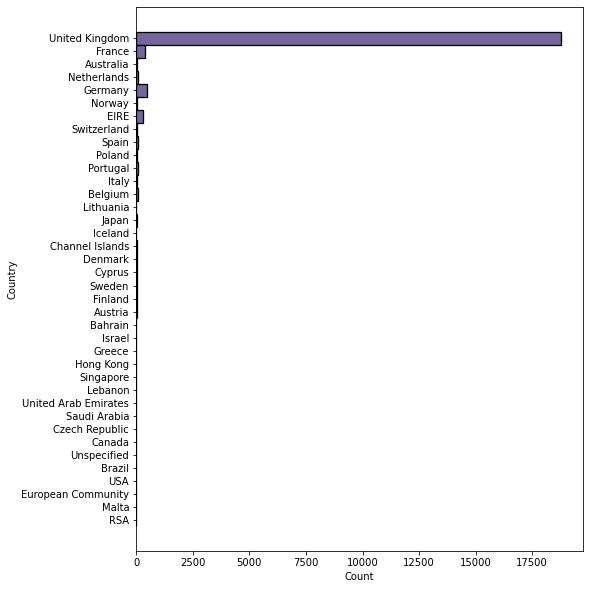

In [16]:
# Analyzing the country column.
fig, ax = plt.subplots(figsize=(8, 10))
sns.histplot(y= grouped_data['Country'], ax=ax, palette= 'bright')

##### As most of the bills are from United Kingdom and no further location is given so we will remove this column.

In [17]:
grouped_data.drop(['Country'],axis= 1)

,InvoiceNo,Quantity_sum,Quantity_min,Quantity_max,Quantity_mean,Avg Cart Price,TotalPrice,UnitPrice_sum,UnitPrice_min,UnitPrice_max,UnitPrice_mean
0,536365,40,2,8,5.714286,19.874286,139.12,27.37,2.55,7.65,3.910000
1,536366,12,6,6,6.000000,11.100000,22.20,3.70,1.85,1.85,1.850000
2,536367,83,2,32,6.916667,23.227500,278.73,58.24,1.65,9.95,4.853333
3,536368,15,3,6,3.750000,17.512500,70.05,19.10,4.25,4.95,4.775000
4,536369,3,3,3,3.000000,17.850000,17.85,5.95,5.95,5.95,5.950000
...,...,...,...,...,...,...,...,...,...,...,...
20721,581584,120,48,72,60.000000,70.320000,140.64,2.57,0.72,1.85,1.285000
20722,581585,278,3,25,13.238095,15.669048,329.05,37.78,0.19,5.95,1.799048
20723,581586,66,8,24,16.500000,84.800000,339.20,20.23,1.25,8.95,5.057500
20724,581587,105,3,12,7.000000,16.630000,249.45,44.50,0.85,4.95,2.966667


In [18]:
grouped_data.columns

Index(['InvoiceNo', 'Country', 'Quantity_sum', 'Quantity_min', 'Quantity_max',
       'Quantity_mean', 'Avg Cart Price', 'TotalPrice', 'UnitPrice_sum',
       'UnitPrice_min', 'UnitPrice_max', 'UnitPrice_mean'],
      dtype='object')

<AxesSubplot:xlabel='TotalPrice'>

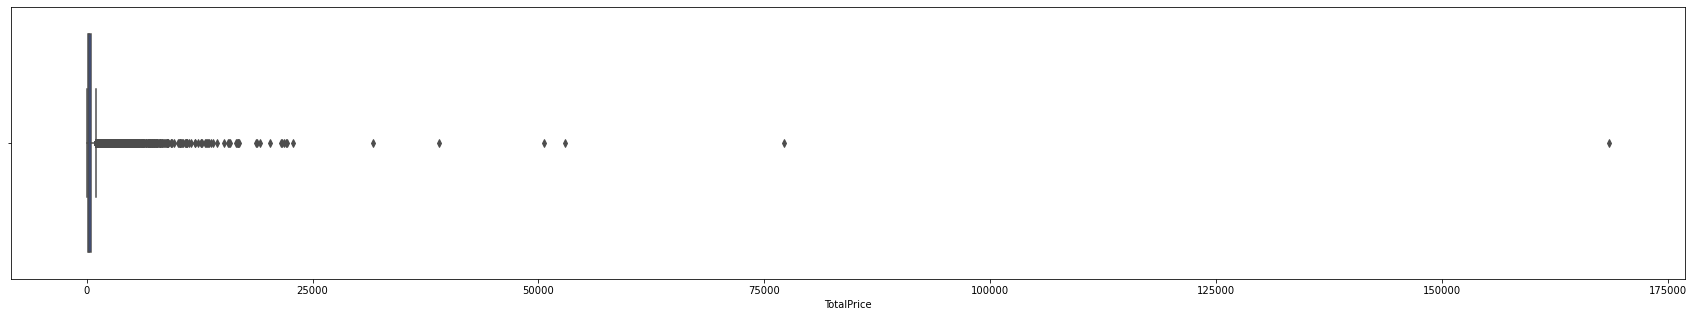

In [19]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['TotalPrice'], palette= 'bright')

<AxesSubplot:xlabel='Quantity_sum'>

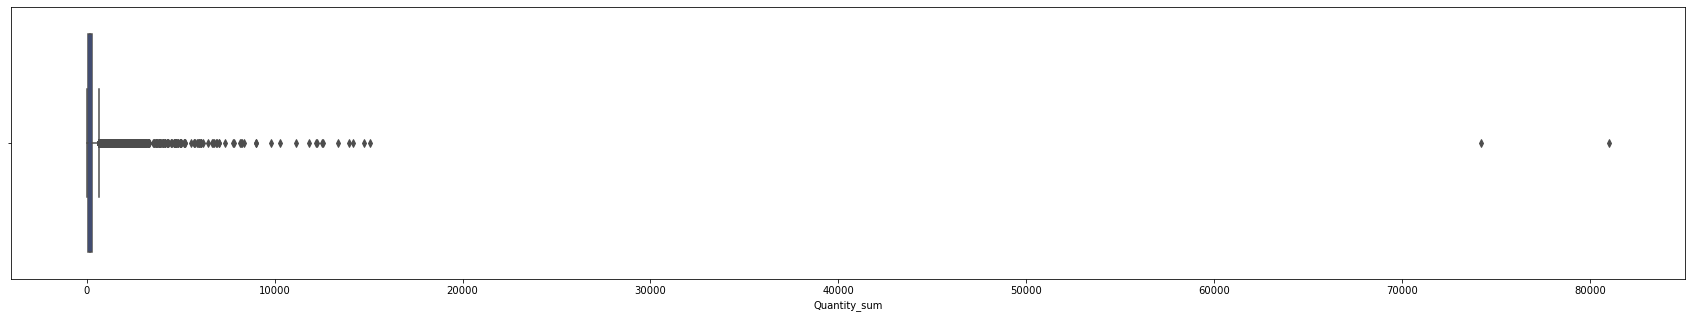

In [20]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['Quantity_sum'], palette= 'bright')

<AxesSubplot:xlabel='Avg Cart Price'>

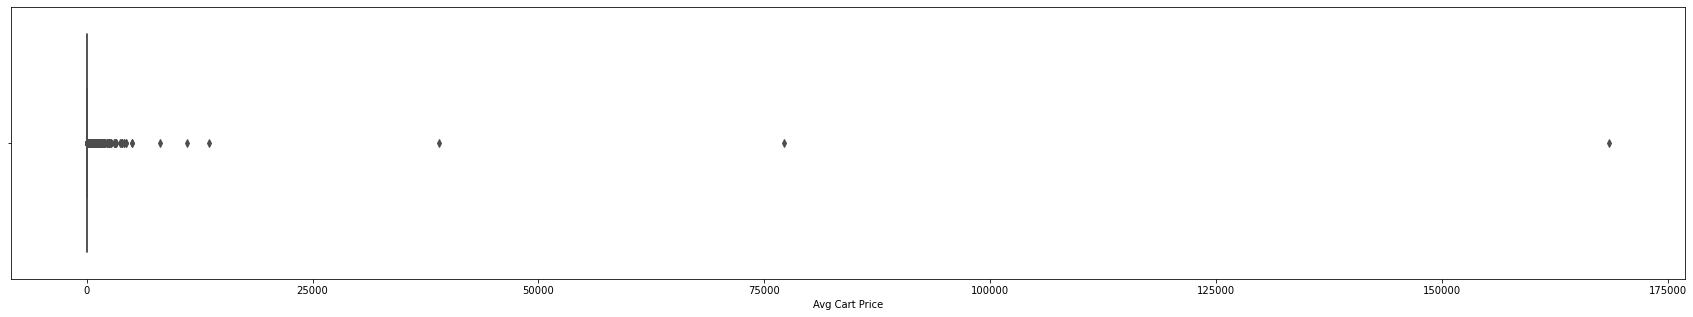

In [21]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['Avg Cart Price'], palette= 'bright')

<AxesSubplot:xlabel='UnitPrice_mean'>

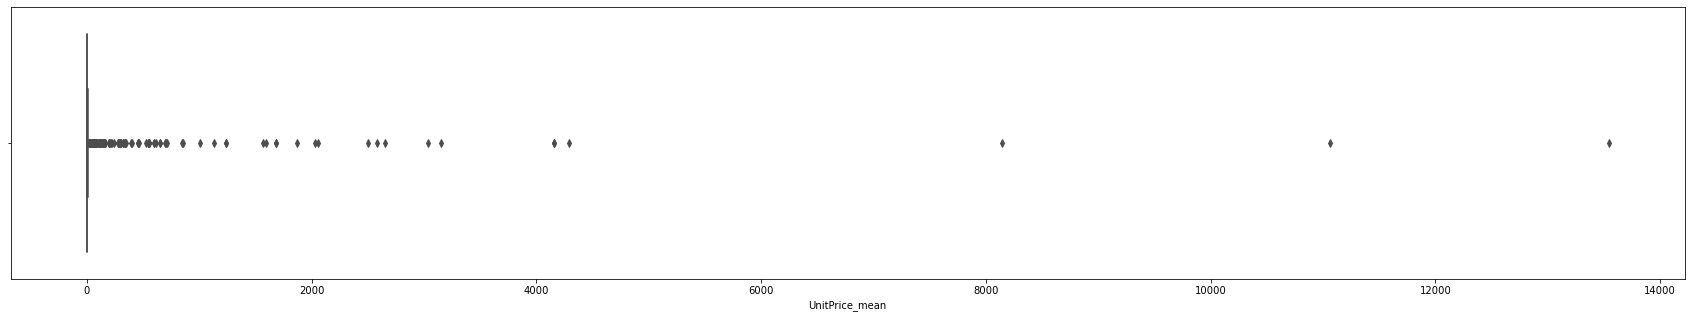

In [22]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['UnitPrice_mean'], palette= 'bright')

<AxesSubplot:xlabel='Quantity_min'>

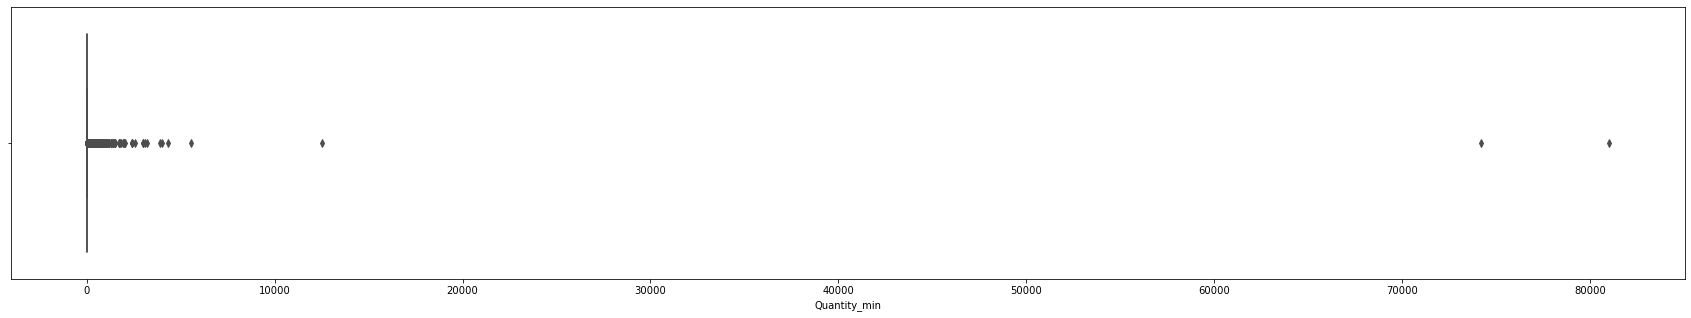

In [23]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['Quantity_min'], palette= 'bright')

<AxesSubplot:xlabel='TotalPrice'>

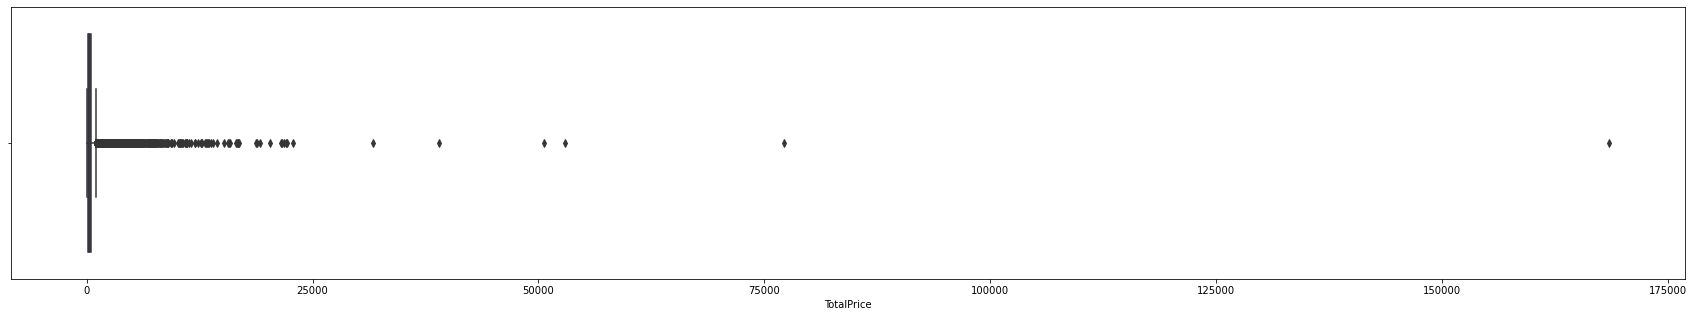

In [24]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['TotalPrice'])

<AxesSubplot:xlabel='UnitPrice_max'>

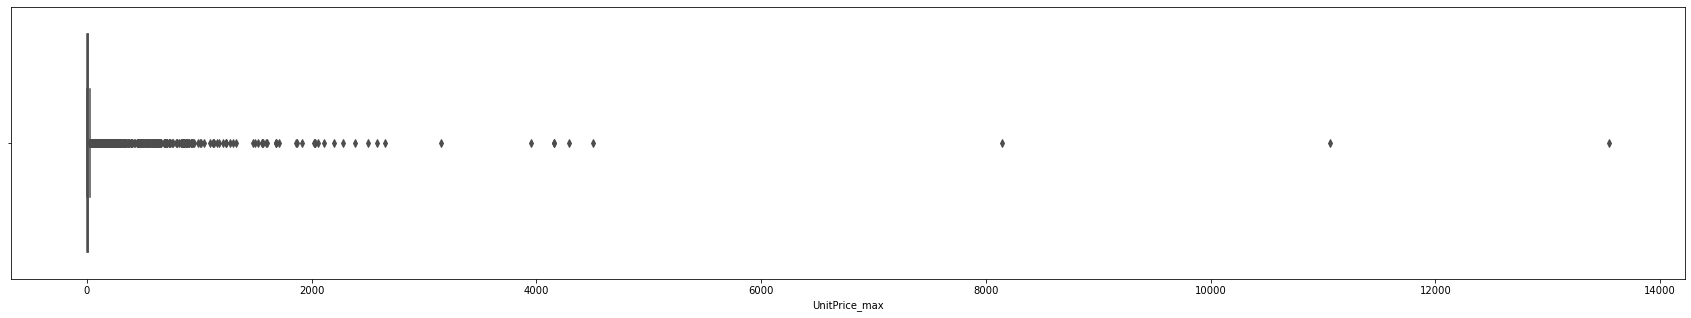

In [25]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['UnitPrice_max'], palette= 'bright')

##### Now we will remove the outliers from the following columns using z-score method. We will remove any valuse which is 3 standard deviation away from the mean of the data.

In [26]:
z_score = np.abs(stats.zscore(grouped_data['TotalPrice']))
grouped_data = grouped_data[z_score <= 2]

In [27]:
z_score1 = np.abs(stats.zscore(grouped_data['Quantity_sum']))
grouped_data = grouped_data[z_score1 <= 2]

In [28]:
z_score2 = np.abs(stats.zscore(grouped_data['Avg Cart Price']))
grouped_data = grouped_data[z_score2 <= 2]

In [29]:
z_score3 = np.abs(stats.zscore(grouped_data['UnitPrice_mean']))
grouped_data = grouped_data[z_score3 <= 2]

In [30]:
z_score4 = np.abs(stats.zscore(grouped_data['Quantity_min']))
grouped_data = grouped_data[z_score4 <= 2]

In [31]:
z_score5 = np.abs(stats.zscore(grouped_data['UnitPrice_max']))
grouped_data = grouped_data[z_score5 <= 2]

In [32]:
z_score6 = np.abs(stats.zscore(grouped_data['UnitPrice_min']))
grouped_data = grouped_data[z_score6 <= 2]

In [33]:
z_score7 = np.abs(stats.zscore(grouped_data['UnitPrice_sum']))
grouped_data = grouped_data[z_score7 <= 2]

<AxesSubplot:xlabel='TotalPrice'>

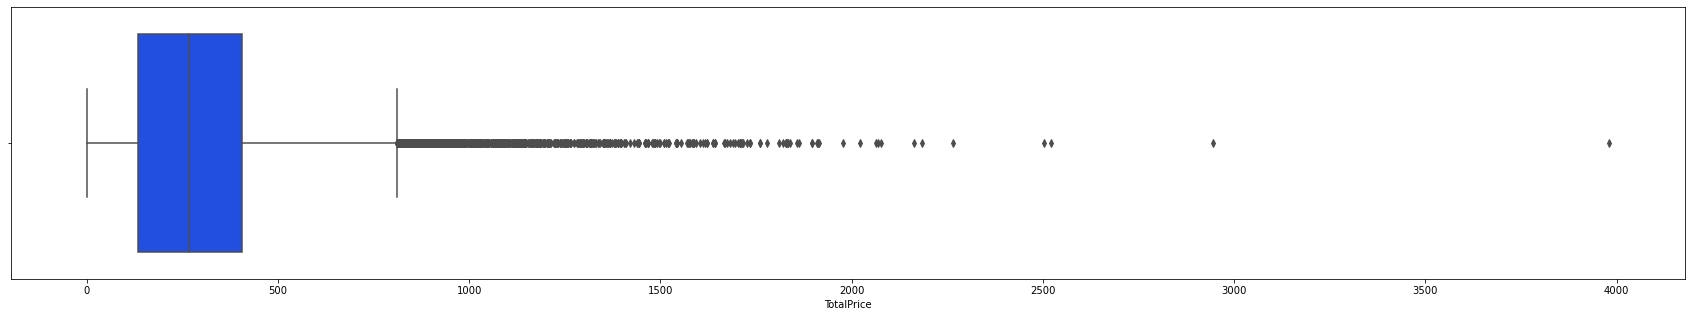

In [34]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['TotalPrice'], palette= 'bright')

<AxesSubplot:xlabel='Quantity_sum'>

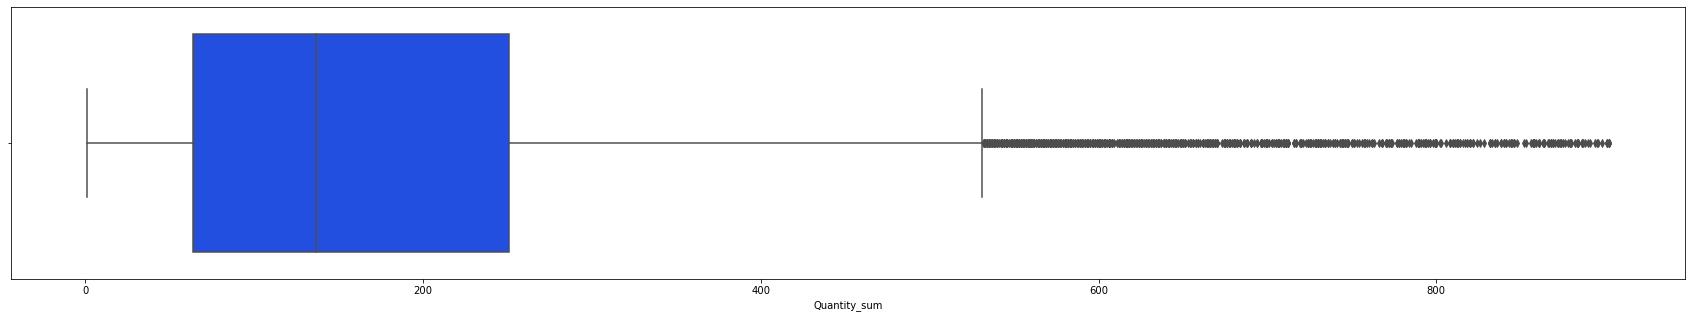

In [35]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['Quantity_sum'], palette= 'bright')

<AxesSubplot:xlabel='Avg Cart Price'>

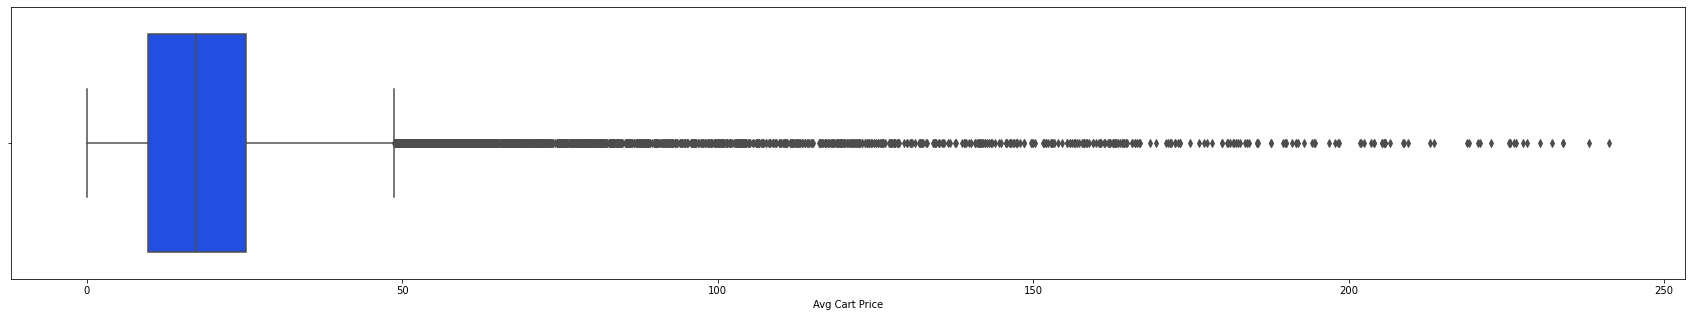

In [36]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['Avg Cart Price'], palette= 'bright')

<AxesSubplot:xlabel='UnitPrice_mean'>

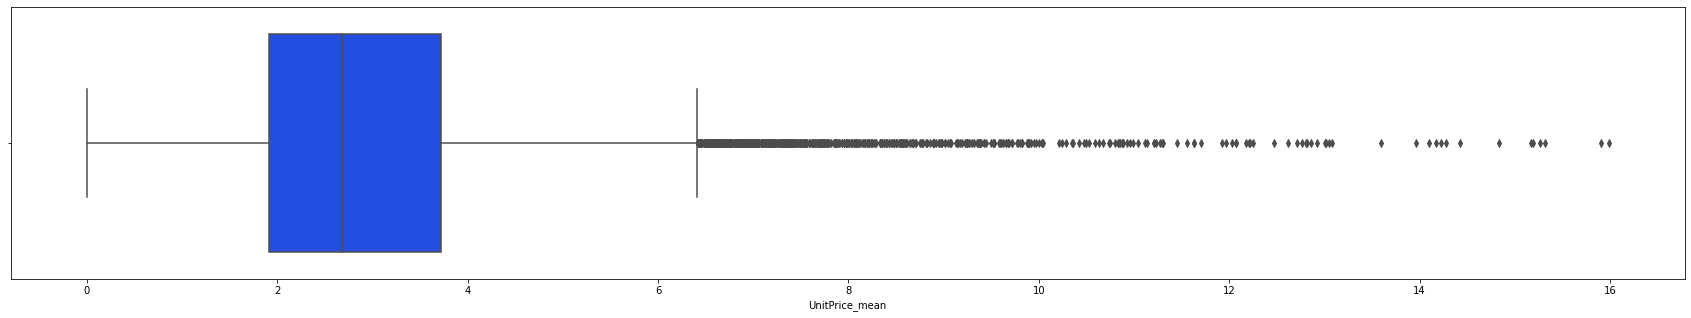

In [37]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['UnitPrice_mean'], palette= 'bright')

<AxesSubplot:xlabel='Quantity_min'>

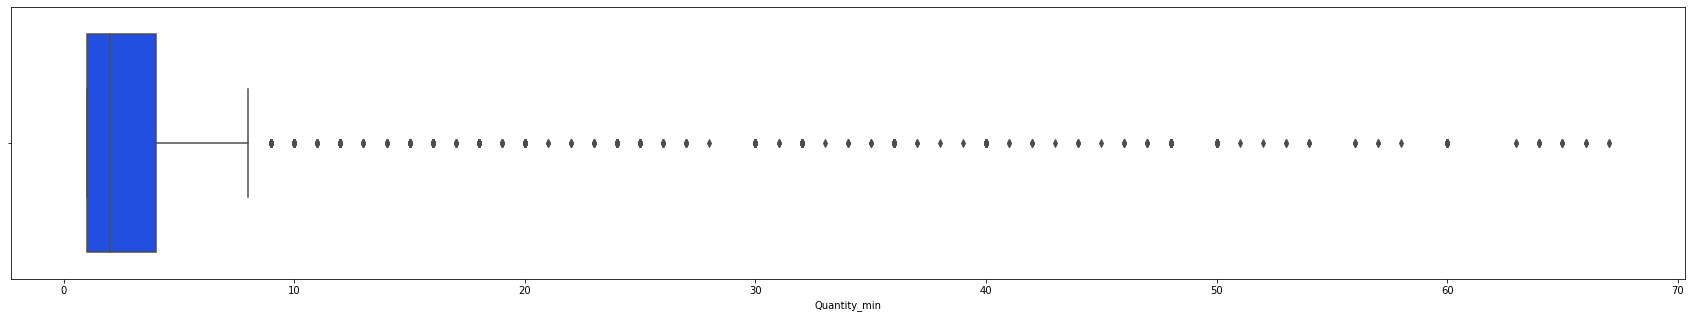

In [38]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['Quantity_min'], palette= 'bright')

<AxesSubplot:xlabel='UnitPrice_max'>

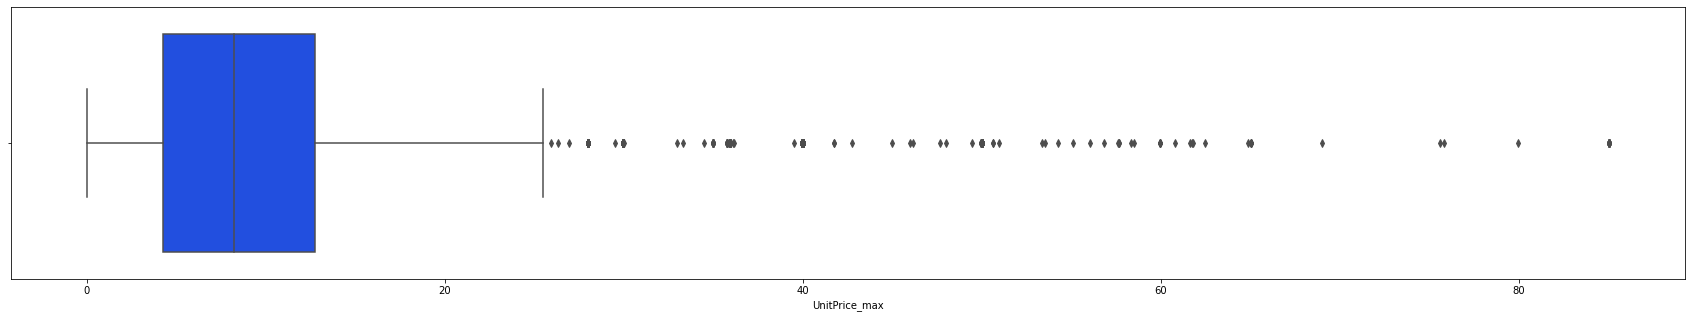

In [39]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['UnitPrice_max'], palette= 'bright')

<AxesSubplot:xlabel='UnitPrice_min'>

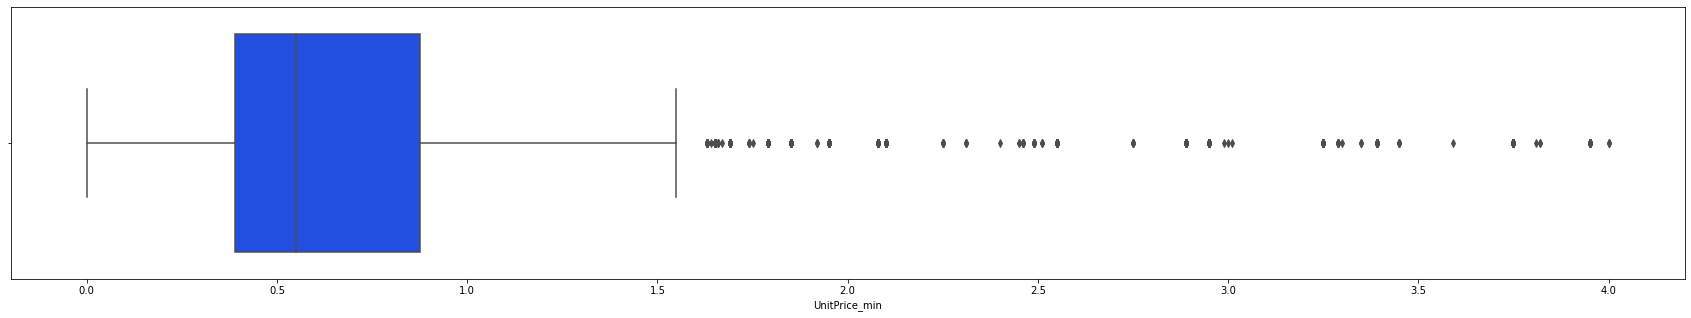

In [40]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['UnitPrice_min'], palette= 'bright')

<AxesSubplot:xlabel='UnitPrice_sum'>

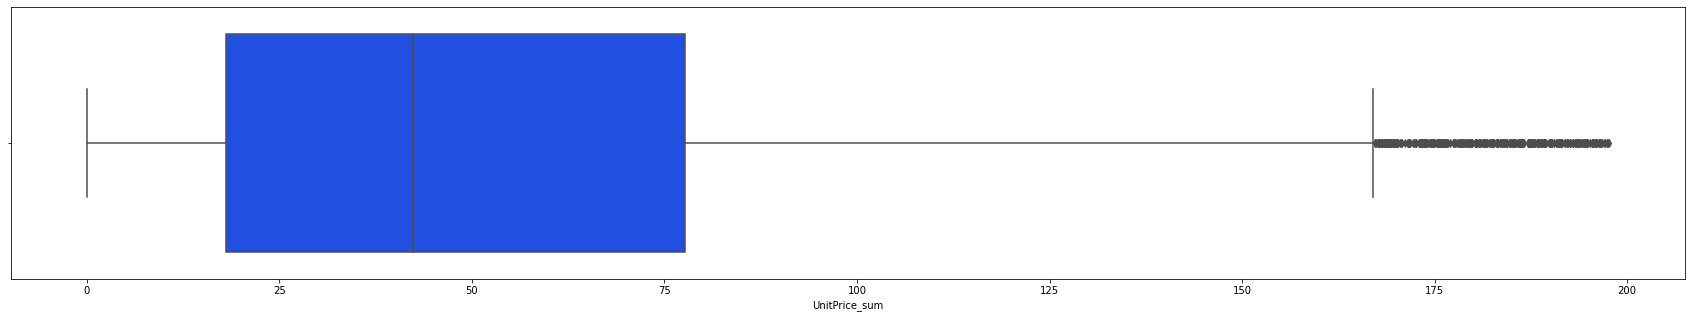

In [41]:
plt.figure(figsize=(30,5))
sns.boxplot(x= grouped_data['UnitPrice_sum'], palette= 'bright')

In [42]:
grouped_data.columns

Index(['InvoiceNo', 'Country', 'Quantity_sum', 'Quantity_min', 'Quantity_max',
       'Quantity_mean', 'Avg Cart Price', 'TotalPrice', 'UnitPrice_sum',
       'UnitPrice_min', 'UnitPrice_max', 'UnitPrice_mean'],
      dtype='object')

In [43]:
final_data = grouped_data[['InvoiceNo', 'TotalPrice','Quantity_sum','Quantity_min','Quantity_max','Quantity_mean','Avg Cart Price', 'UnitPrice_min','UnitPrice_max','UnitPrice_mean']]

In [44]:
final_data.head()

,InvoiceNo,TotalPrice,Quantity_sum,Quantity_min,Quantity_max,Quantity_mean,Avg Cart Price,UnitPrice_min,UnitPrice_max,UnitPrice_mean
0,536365,139.12,40,2,8,5.714286,19.874286,2.55,7.65,3.910000
1,536366,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000
2,536367,278.73,83,2,32,6.916667,23.227500,1.65,9.95,4.853333
5,536370,855.86,449,3,48,22.450000,42.793000,0.42,18.00,2.764500
7,536372,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000


##### Now we will analyze the final data after preprocessing.

In [45]:
final_data.describe()

,TotalPrice,Quantity_sum,Quantity_min,Quantity_max,Quantity_mean,Avg Cart Price,UnitPrice_min,UnitPrice_max,UnitPrice_mean
count,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
mean,313.174438,181.987071,4.634814,37.324518,13.720470,23.811663,0.771629,9.415200,2.960189
std,265.020319,163.372700,7.877555,46.320957,16.089278,26.656023,0.692292,8.150175,1.687654
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,134.815000,64.000000,1.000000,12.000000,5.210526,9.633934,0.390000,4.250000,1.914844
50%,267.740000,137.000000,2.000000,24.000000,9.793884,17.373321,0.550000,8.250000,2.685000
75%,405.195000,251.000000,4.000000,48.000000,15.250000,25.273500,0.875000,12.750000,3.716667
max,3978.990000,902.000000,67.000000,720.000000,306.000000,241.200000,4.000000,85.000000,15.984286


<AxesSubplot:>

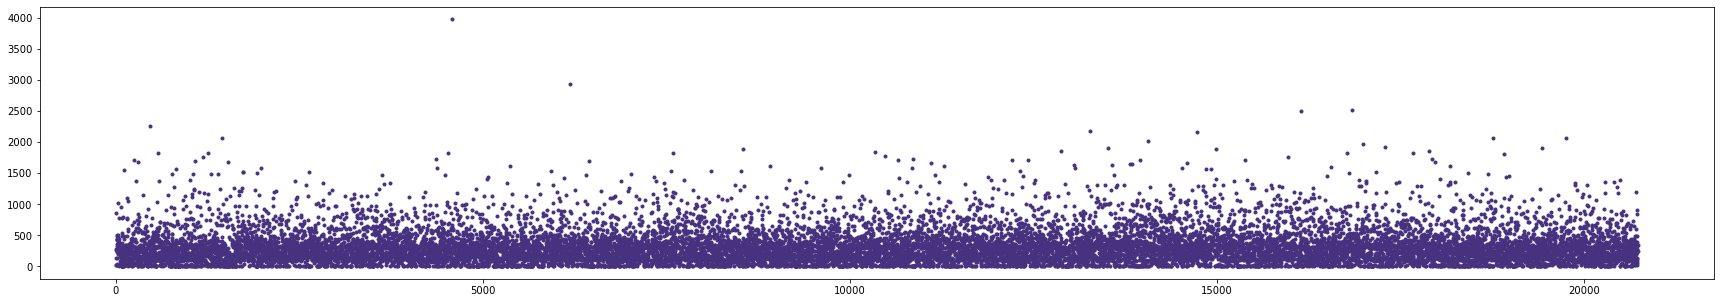

In [46]:
plt.figure(figsize=(30,5))
final_data['TotalPrice'].plot(style=".")

In [47]:
corr = final_data.corr()

<AxesSubplot:>

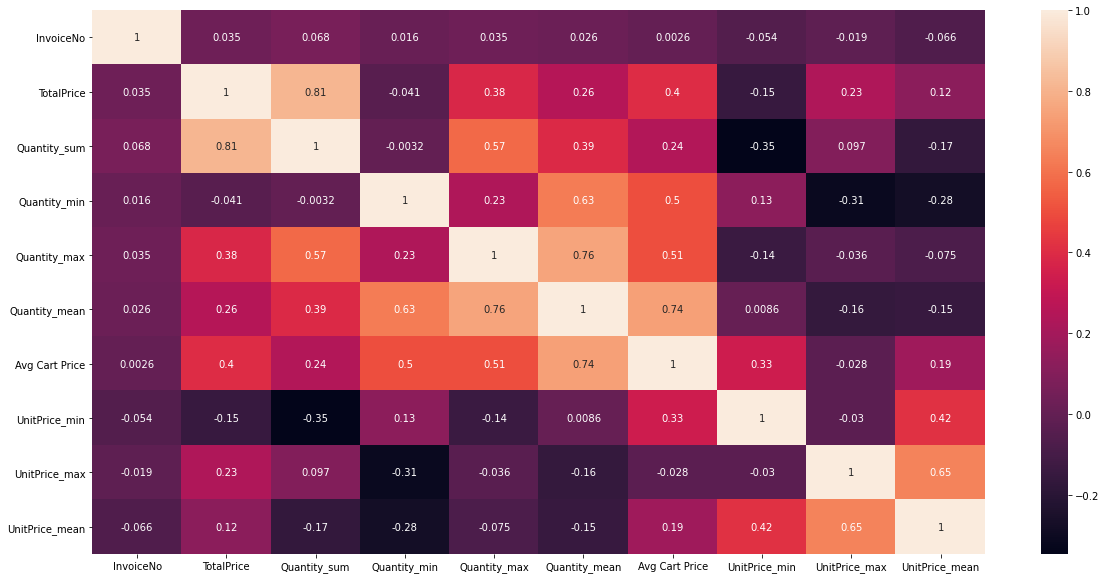

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [49]:
final_data.columns

Index(['InvoiceNo', 'TotalPrice', 'Quantity_sum', 'Quantity_min',
       'Quantity_max', 'Quantity_mean', 'Avg Cart Price', 'UnitPrice_min',
       'UnitPrice_max', 'UnitPrice_mean'],
      dtype='object')

In [50]:
cols = list(final_data.columns.values)
print(cols)

['InvoiceNo', 'TotalPrice', 'Quantity_sum', 'Quantity_min', 'Quantity_max', 'Quantity_mean', 'Avg Cart Price', 'UnitPrice_min', 'UnitPrice_max', 'UnitPrice_mean']


In [51]:
cols.pop(cols.index('InvoiceNo'))
cols.pop(cols.index('TotalPrice'))
cols.pop(cols.index('Avg Cart Price'))
print(cols)


['Quantity_sum', 'Quantity_min', 'Quantity_max', 'Quantity_mean', 'UnitPrice_min', 'UnitPrice_max', 'UnitPrice_mean']


In [52]:
print(cols)

['Quantity_sum', 'Quantity_min', 'Quantity_max', 'Quantity_mean', 'UnitPrice_min', 'UnitPrice_max', 'UnitPrice_mean']


In [53]:
final_data.head()

,InvoiceNo,TotalPrice,Quantity_sum,Quantity_min,Quantity_max,Quantity_mean,Avg Cart Price,UnitPrice_min,UnitPrice_max,UnitPrice_mean
0,536365,139.12,40,2,8,5.714286,19.874286,2.55,7.65,3.910000
1,536366,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000
2,536367,278.73,83,2,32,6.916667,23.227500,1.65,9.95,4.853333
5,536370,855.86,449,3,48,22.450000,42.793000,0.42,18.00,2.764500
7,536372,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000


In [54]:
new_data = final_data.drop(['InvoiceNo','Avg Cart Price','Quantity_sum','UnitPrice_mean'], axis=1)

In [55]:
new_data.head()

,TotalPrice,Quantity_min,Quantity_max,Quantity_mean,UnitPrice_min,UnitPrice_max
0,139.12,2,8,5.714286,2.55,7.65
1,22.20,6,6,6.000000,1.85,1.85
2,278.73,2,32,6.916667,1.65,9.95
5,855.86,3,48,22.450000,0.42,18.00
7,22.20,6,6,6.000000,1.85,1.85


In [56]:
new_data.columns

Index(['TotalPrice', 'Quantity_min', 'Quantity_max', 'Quantity_mean',
       'UnitPrice_min', 'UnitPrice_max'],
      dtype='object')

In [57]:
new_data.head()

,TotalPrice,Quantity_min,Quantity_max,Quantity_mean,UnitPrice_min,UnitPrice_max
0,139.12,2,8,5.714286,2.55,7.65
1,22.20,6,6,6.000000,1.85,1.85
2,278.73,2,32,6.916667,1.65,9.95
5,855.86,3,48,22.450000,0.42,18.00
7,22.20,6,6,6.000000,1.85,1.85


In [58]:
norm_data = preprocessing.normalize(new_data)

In [59]:
norm_data

array([[9.95747165e-01, 1.43149391e-02, 5.72597565e-02, 4.08998261e-02,
        1.82515474e-02, 5.47546421e-02],
       [9.00562205e-01, 2.43395190e-01, 2.43395190e-01, 2.43395190e-01,
        7.50468504e-02, 7.50468504e-02],
       [9.92506503e-01, 7.12163386e-03, 1.13946142e-01, 2.46289838e-02,
        5.87534794e-03, 3.54301285e-02],
       ...,
       [9.96121986e-01, 9.08179899e-03, 7.56816583e-02, 4.00752400e-02,
        5.75180603e-04, 1.80122347e-02],
       [9.95708542e-01, 2.34836920e-02, 7.04510761e-02, 4.84351148e-02,
        3.66932688e-03, 2.62723804e-02],
       [9.98179160e-01, 1.20045600e-02, 4.80182398e-02, 2.80106399e-02,
        3.40129199e-03, 1.98075239e-02]])

In [60]:
norm_data_df = pd.DataFrame(norm_data, columns=new_data.columns)

In [61]:
norm_data_df.head()

,TotalPrice,Quantity_min,Quantity_max,Quantity_mean,UnitPrice_min,UnitPrice_max
0,0.995747,0.014315,0.057260,0.040900,0.018252,0.054755
1,0.900562,0.243395,0.243395,0.243395,0.075047,0.075047
2,0.992507,0.007122,0.113946,0.024629,0.005875,0.035430
3,0.997863,0.003498,0.055964,0.026175,0.000490,0.020987
4,0.900562,0.243395,0.243395,0.243395,0.075047,0.075047


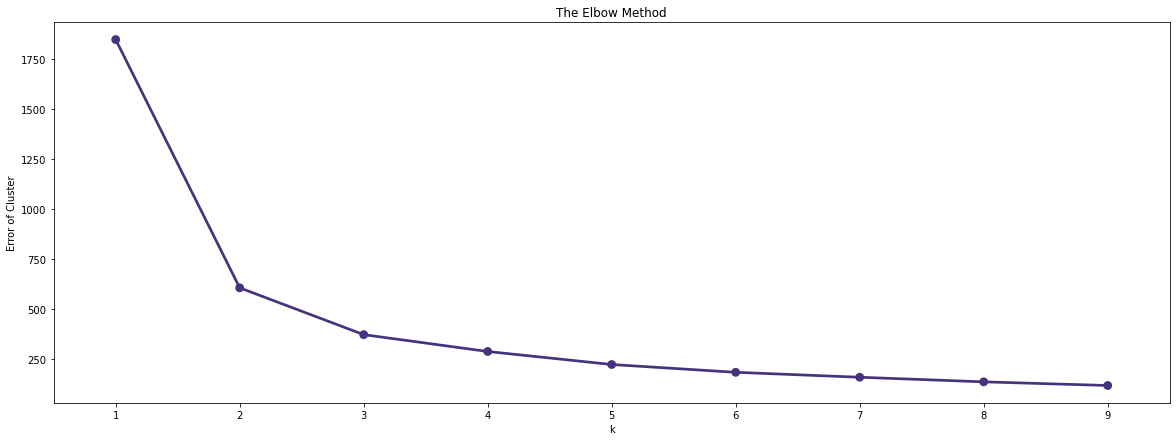

In [62]:
errors = []
for k in range(1,10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(norm_data)
    errors.append(model.inertia_)

plt.figure(figsize=(20,7))
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 10)), y=errors)
plt.show()

In [63]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
labels = kmeans.fit(norm_data_df)

In [64]:
norm_data_df.head()

,TotalPrice,Quantity_min,Quantity_max,Quantity_mean,UnitPrice_min,UnitPrice_max
0,0.995747,0.014315,0.057260,0.040900,0.018252,0.054755
1,0.900562,0.243395,0.243395,0.243395,0.075047,0.075047
2,0.992507,0.007122,0.113946,0.024629,0.005875,0.035430
3,0.997863,0.003498,0.055964,0.026175,0.000490,0.020987
4,0.900562,0.243395,0.243395,0.243395,0.075047,0.075047


<AxesSubplot:xlabel='TotalPrice', ylabel='Quantity_mean'>

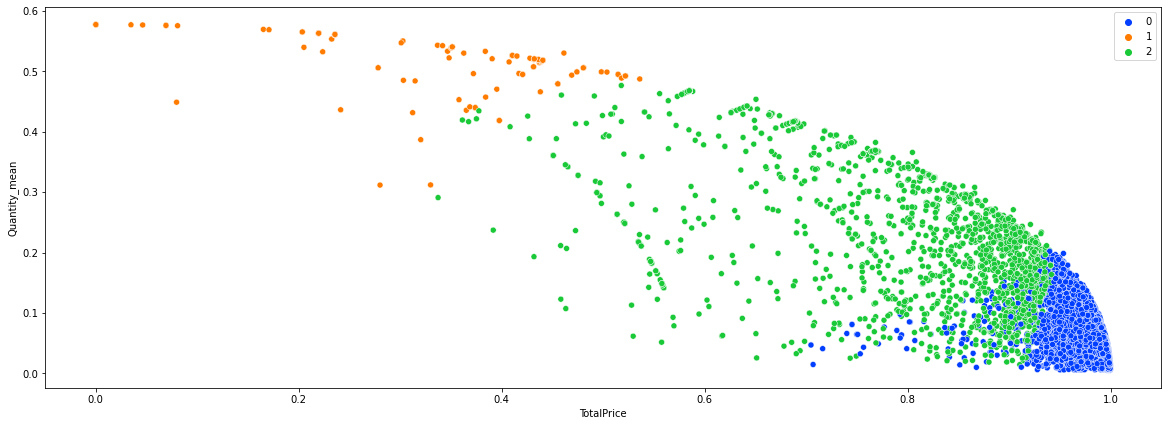

In [65]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=norm_data_df, x='TotalPrice', y='Quantity_mean', hue=kmeans.labels_, palette= 'bright')

<AxesSubplot:ylabel='Quantity_min'>

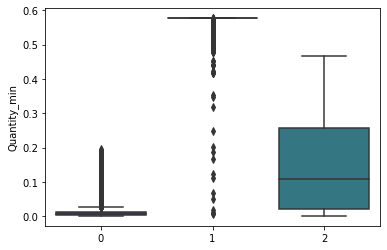

In [66]:
sns.boxplot(x = kmeans.labels_, y = norm_data_df['Quantity_min'])

In [67]:
from sklearn.metrics import silhouette_score

silhouette_score(norm_data_df, kmeans.labels_, metric='euclidean')

0.7024776027869267

In [68]:
new_data.head()

,TotalPrice,Quantity_min,Quantity_max,Quantity_mean,UnitPrice_min,UnitPrice_max
0,139.12,2,8,5.714286,2.55,7.65
1,22.20,6,6,6.000000,1.85,1.85
2,278.73,2,32,6.916667,1.65,9.95
5,855.86,3,48,22.450000,0.42,18.00
7,22.20,6,6,6.000000,1.85,1.85


In [69]:
final_data.loc[:,'cluster'] = kmeans.labels_

In [70]:
final_data.head()

,InvoiceNo,TotalPrice,Quantity_sum,Quantity_min,Quantity_max,Quantity_mean,Avg Cart Price,UnitPrice_min,UnitPrice_max,UnitPrice_mean,cluster
0,536365,139.12,40,2,8,5.714286,19.874286,2.55,7.65,3.910000,0
1,536366,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000,2
2,536367,278.73,83,2,32,6.916667,23.227500,1.65,9.95,4.853333,0
5,536370,855.86,449,3,48,22.450000,42.793000,0.42,18.00,2.764500,0
7,536372,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000,2


In [71]:
final_data['cluster'].unique()

array([0, 2, 1])

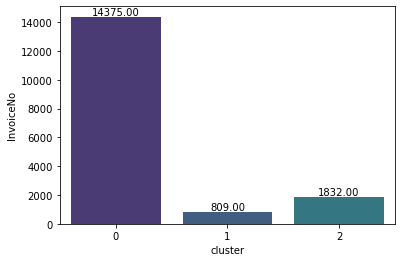

In [72]:
cluster_dist = final_data.groupby('cluster')['InvoiceNo'].count().reset_index()
sns.barplot(data=cluster_dist, x='cluster', y='InvoiceNo')
for index, value in enumerate(cluster_dist['InvoiceNo']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

In [73]:
final_data.head(2)

,InvoiceNo,TotalPrice,Quantity_sum,Quantity_min,Quantity_max,Quantity_mean,Avg Cart Price,UnitPrice_min,UnitPrice_max,UnitPrice_mean,cluster
0,536365,139.12,40,2,8,5.714286,19.874286,2.55,7.65,3.91,0
1,536366,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.85,2


In [74]:
final_data.groupby('cluster')['TotalPrice'].mean()

cluster
0    354.202541
1      4.011570
2    127.767107
Name: TotalPrice, dtype: float64

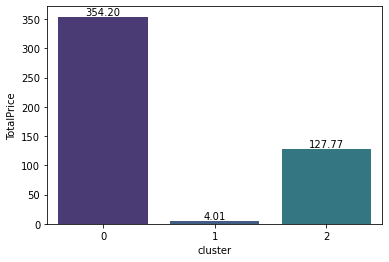

In [75]:
tprice_dist = final_data.groupby('cluster')['TotalPrice'].mean().reset_index()
sns.barplot(data=tprice_dist, x='cluster', y='TotalPrice')
for index, value in enumerate(tprice_dist['TotalPrice']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

In [76]:
final_data.head()

,InvoiceNo,TotalPrice,Quantity_sum,Quantity_min,Quantity_max,Quantity_mean,Avg Cart Price,UnitPrice_min,UnitPrice_max,UnitPrice_mean,cluster
0,536365,139.12,40,2,8,5.714286,19.874286,2.55,7.65,3.910000,0
1,536366,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000,2
2,536367,278.73,83,2,32,6.916667,23.227500,1.65,9.95,4.853333,0
5,536370,855.86,449,3,48,22.450000,42.793000,0.42,18.00,2.764500,0
7,536372,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000,2


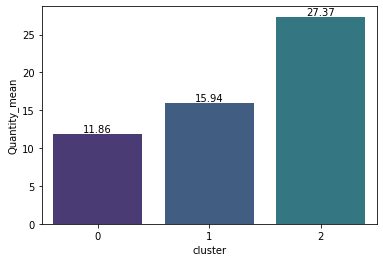

In [77]:
quantity_dist = final_data.groupby('cluster')['Quantity_mean'].mean().reset_index()
sns.barplot(data=quantity_dist, x='cluster', y='Quantity_mean')
for index, value in enumerate(quantity_dist['Quantity_mean']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

In [78]:
print(final_data.dtypes)

InvoiceNo          object
TotalPrice        float64
Quantity_sum        int64
Quantity_min        int64
Quantity_max        int64
Quantity_mean     float64
Avg Cart Price    float64
UnitPrice_min     float64
UnitPrice_max     float64
UnitPrice_mean    float64
cluster             int32
dtype: object


In [79]:
final_data.columns

Index(['InvoiceNo', 'TotalPrice', 'Quantity_sum', 'Quantity_min',
       'Quantity_max', 'Quantity_mean', 'Avg Cart Price', 'UnitPrice_min',
       'UnitPrice_max', 'UnitPrice_mean', 'cluster'],
      dtype='object')

In [80]:
final_data.head()

,InvoiceNo,TotalPrice,Quantity_sum,Quantity_min,Quantity_max,Quantity_mean,Avg Cart Price,UnitPrice_min,UnitPrice_max,UnitPrice_mean,cluster
0,536365,139.12,40,2,8,5.714286,19.874286,2.55,7.65,3.910000,0
1,536366,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000,2
2,536367,278.73,83,2,32,6.916667,23.227500,1.65,9.95,4.853333,0
5,536370,855.86,449,3,48,22.450000,42.793000,0.42,18.00,2.764500,0
7,536372,22.20,12,6,6,6.000000,11.100000,1.85,1.85,1.850000,2


### Now we will ask some questions to analyze the cluster:

#### 1. How many data points are in each cluster?

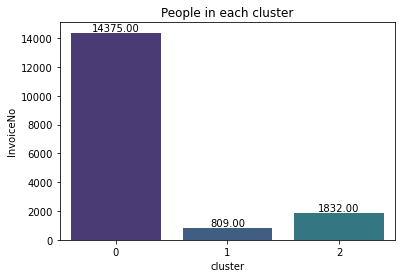

In [81]:
cluster_dist = final_data.groupby('cluster')['InvoiceNo'].count().reset_index()
sns.barplot(data=cluster_dist, x='cluster', y='InvoiceNo')
for index, value in enumerate(cluster_dist['InvoiceNo']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    plt.title('People in each cluster', loc= 'center')

#### 2. What is the total sales value for each cluster?

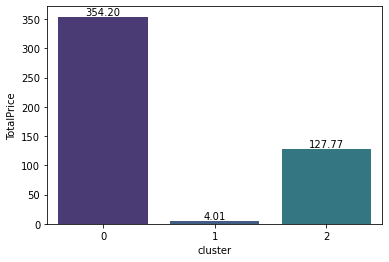

In [82]:
tprice_dist = final_data.groupby('cluster')['TotalPrice'].mean().reset_index()
sns.barplot(data=tprice_dist, x='cluster', y='TotalPrice')
for index, value in enumerate(tprice_dist['TotalPrice']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

#### 3. How are the clusters distributed across the dataset?

<AxesSubplot:xlabel='cluster', ylabel='TotalPrice'>

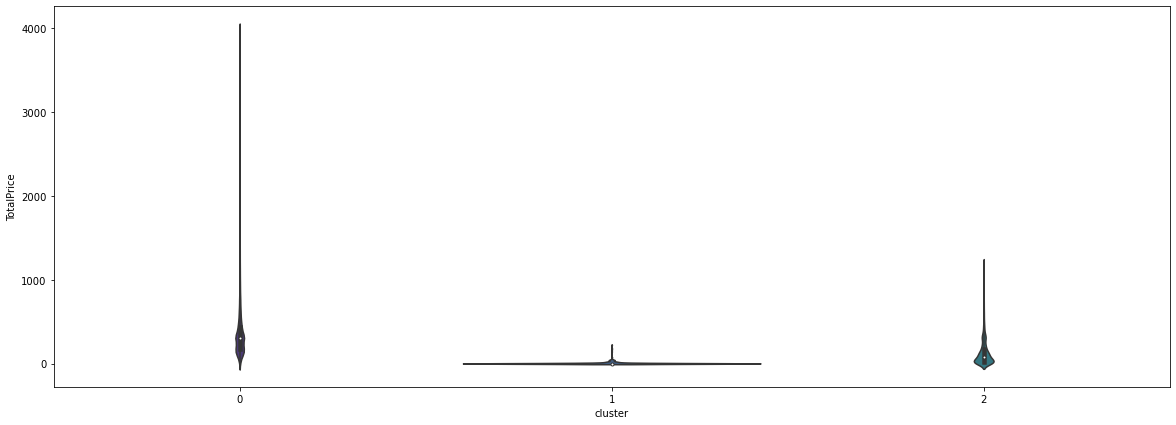

In [83]:
import random

# Sample 1000 data points
sampled_data = final_data.sample(n=2000, random_state=42)

# Create violin plot using the sampled data
plt.figure(figsize=(20,7))
sns.violinplot(data=final_data, x="cluster", y="TotalPrice")